# Network Analysis Project

After completing 'A Network Analysis of Game of Thrones' project on datacamp I began to search for datasets for movies/shows I was interested in. One franchise I am really interested in is the Marvel franchise. Firstly, I must import various modules and import the dataset itself.

In [1]:
#import modules
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
import numpy as np
%matplotlib inline

#loading the dataset
marveldf = pd.read_csv('hero-network.csv')
marveldf.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


Before we begin to analyse the dataset let's check the size of it.

In [2]:
len(marveldf)

574467

In [3]:
print('Number of heroes in the dataset: ' + str(marveldf['hero1'].nunique()))

Number of heroes in the dataset: 6211


As you can see, the dataframe contains 574,476 different elements and also 6,211 different heroes. This is a large dataset which is ideal because as stated by the central limit theorem the more samples that exist, the more accurate our findings are.

In [1]:
#examining the head of the dataset(first 5 rows)
marveldf.head()

NameError: name 'marveldf' is not defined

After examining the head of the dataset we can see that the dataset has two columns - hero1 and hero2. Each column contains the names of heroes, each superhero name is known as a node. In this dataset two nodes have an edge if they have appeared in a comic together. Let's take a look at the graph below, As we can see two nodes have an edge if they have something in common between them, in this case it is if they have appeared in the same comic together. Let's take for example the first row in the head of our dataset, this tells us that Little, Abner has appeared in a comic with Princess Zanda and therefore an edge exists between them.

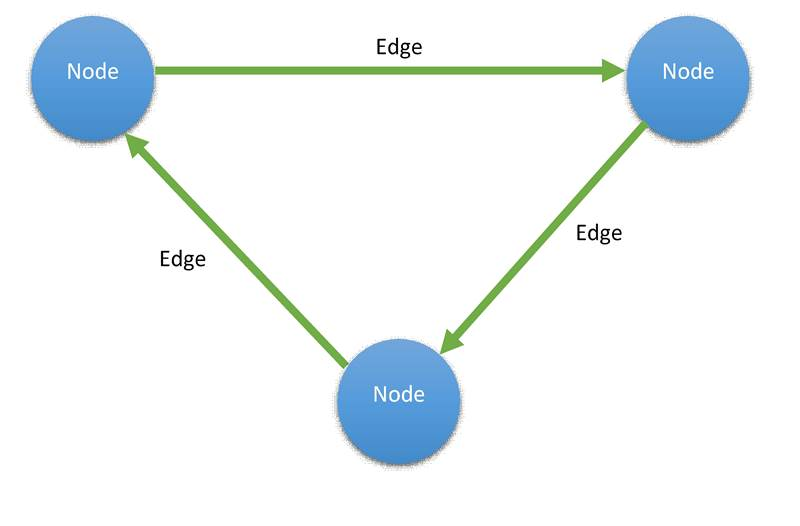

In [5]:
from IPython.display import Image
Image('graph_structure.jpg')

Firstly, we need to create a networkx graph so we can begin to analyse these nodes and conduct various network analysis techniques on them.

In [6]:
#creating networkx graph
marvel_graph = nx.Graph()

#checking to see what is in the graph
len(marvel_graph)

0

As we can see we have created a graph but the graph is empty, therefore we have to populate it with edges from the marveldf dataframe. To do this we must iterate through the dataframe to add edges.

In [7]:
#populating the graph
for _, edge in marveldf.iterrows():
    marvel_graph.add_edge(edge['hero1'], edge['hero2'])

#checking once again to see if the graph is still empty
len(marvel_graph)

6426

As we can see the graph is no longer empty and is of size 6426. To get a better idea of the size of the graph lets visualize it using a matrix plot.

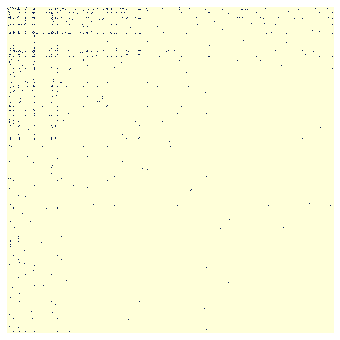

In [8]:
from nxviz.plots import MatrixPlot
MatrixPlot(marvel_graph).draw()
plt.show()

In a MatrixPlot, nodes are the rows and columns of the matrix, and cells are filled in according to whether an edge exists between the pair of nodes. As we can see the graph is no longer empty and is instead populated with different nodes and their associated neighbors. Before we analyse anything we must first discuss what a neighbor actually is. A neighbor is the associated node which another node is connected to. Let's firstly take a look at a sample of the neighbors Captain America has. As we can see below 'UATU' is one of Captain Americas neighbors, this means that Captain America has appeared in a comic with 'UATU'.

In [9]:
list(marvel_graph.neighbors('CAPTAIN AMERICA'))[:5]

['UATU',
 'SPEEDBALL/ROBBIE BAL',
 'CYCLOPS/SCOTT SUMMER',
 'GHOST RIDER III/DAN ',
 'BEAST/HENRY &HANK& P']

# Who's the most important hero in the Marvel franchise?

## Degree Centrality

Firstly, let's take a look at the graphs below, which graph might be considered most important? Of course we would think the fourth graph to be more important than the other graphs because its center node is connected to more nodes than the other centre nodes. Each node that the center node is connected to is known as a neighbor to that centre node.

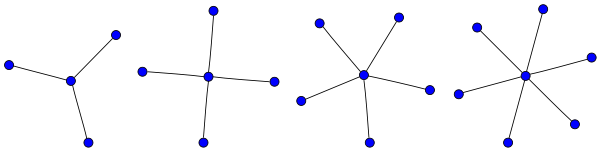

In [10]:
Image('Star Graph.png')

Degree Centrality is defined as the number of neighbors I have divided by the total number of neighbors I could have. One exception to this formula is when self loops exist. Self loops are when a node can be mapped to itself, for example a train journey may start and finish at the same station. In this case the definition is essentially the same but must not forget to include yourself. Examples of nodes in real life with high degree centrality would be social media influencers(large number of followers), Grand Central station and popular characters in movies/tv shows. Lets take a look at the most important heroes in the marvel universe by degree centrality.

In [31]:
#calculating the degree centrality of the dataset
deg_cen_marvel = nx.degree_centrality(marvel_graph)

#sorting this dict by degree centrality and returning the top 5
top_5_deg = sorted(deg_cen_marvel.items(), key=lambda x:x[1], reverse=True)[:5]
top_5_deg

[('CAPTAIN AMERICA', 0.2969649805447471),
 ('SPIDER-MAN/PETER PAR', 0.2703501945525292),
 ('IRON MAN/TONY STARK ', 0.23688715953307396),
 ('THING/BENJAMIN J. GR', 0.2203891050583658),
 ('MR. FANTASTIC/REED R', 0.21463035019455254)]

In [32]:
#checking number of neighbors 'Captain America' has
nx.degree(marvel_graph, 'CAPTAIN AMERICA')

1908

As we can see Captain America is seen as the most important hero by degree centrality, he has 1908 connections. i.e. Captain America has the most neighbors in the dataset(1908). To get a better grasp on the difference of degree centralities of the top 5 heroes lets plot them.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

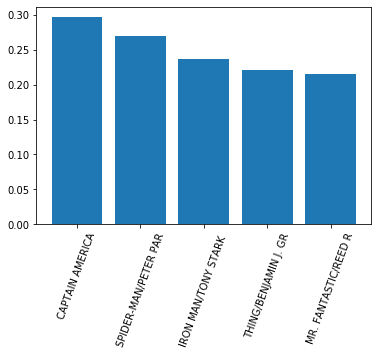

In [13]:
plt.bar(range(len(top_5_deg)), [val[1] for val in top_5_deg], align='center')
plt.xticks(range(len(top_5_deg)), [val[0] for val in top_5_deg])
plt.xticks(rotation=70)

As we can see there isn't much variation in degree centralities of the top 5 heroes. To get a better idea of the degree centralities let's take a look at the degree distribution of the network.

(array([6.109e+03, 1.920e+02, 6.700e+01, 2.000e+01, 9.000e+00, 1.600e+01,
        6.000e+00, 5.000e+00, 0.000e+00, 2.000e+00]),
 array([1.55642023e-04, 2.98365759e-02, 5.95175097e-02, 8.91984436e-02,
        1.18879377e-01, 1.48560311e-01, 1.78241245e-01, 2.07922179e-01,
        2.37603113e-01, 2.67284047e-01, 2.96964981e-01]),
 <a list of 10 Patch objects>)

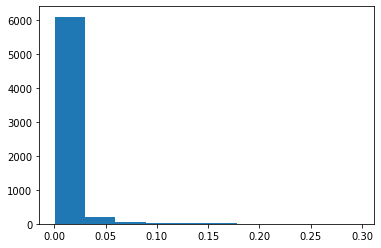

In [14]:
plt.hist(list(deg_cen_marvel.values()))

As we can see the majority of heroes have a degree distribution between 0 and 0.025. Captain America's degree centrality is much greater than 0.025 and can therefore be seen as an outlier. Although this gives us a good idea of the spread of degree centralities it doesn't tell us how much more 'important' Captain America is in relation to other heroes. Therefore let's compare the degree centrality of Captain America to the degree centrality of the average hero in the Marvel universe.

In [15]:
#calculating the average of degree centrality(not including captain america)
avg_deg = sum(n for _, n in sorted(deg_cen_marvel.items(), key=lambda x:x[1], reverse=True)[1:])/len(sorted(deg_cen_marvel.items(), key=lambda x:x[1], reverse=True)[1:])
avg_deg

0.008055352844100852

As we can see the average degree centrality is 0.008055352844100852, let's take a look at this graphically and compare it to Captain Americas degree centrality.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

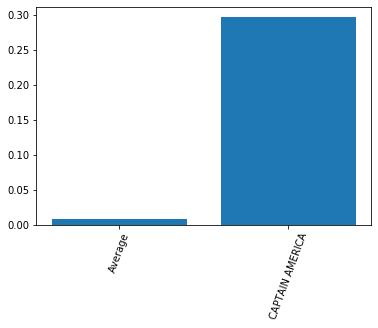

In [16]:
#create a tuple of ('Average',0.008055352844100852)
avg_tuple_d = [('Average',avg_deg)]
#Concatenating both tuple pairs to make it easier to plot
list_tuple_d = avg_tuple_d+sorted(deg_cen_marvel.items(), key=lambda x:x[1], reverse=True)[:1]
plt.bar(range(len(list_tuple_d)), [val[1] for val in list_tuple_d], align='center')
plt.xticks(range(len(list_tuple_d)), [val[0] for val in list_tuple_d])
plt.xticks(rotation=70)

From the graph above we can see that Captain America's degree centrality is significantly higher than the average hero in the dataset. To get a better grasp on degree centrality, let's take a look at the 5 least important characters.

In [17]:
bot_5_deg = sorted(deg_cen_marvel.items(), key=lambda x:x[1], reverse=False)[:5]
bot_5_deg

[('AZRAEL', 0.0001556420233463035),
 ('PAST MASTER/PROFESSO', 0.0001556420233463035),
 ('CAPTAIN FATE', 0.0001556420233463035),
 ('MARKS, DR. SHIELA', 0.0001556420233463035),
 ('SHAW, MILDRED', 0.0001556420233463035)]

In [18]:
nx.degree(marvel_graph, 'AZRAEL')

1

In [19]:
nx.degree(marvel_graph, 'CAPTAIN FATE')

1

As we can see 'Azrael' and 'Captain Fate' are seen as some of the least important heroes in the Marvel Universe by degree centrality, they both have one nighbor. To get a better understanding of this let's take a look at who their neighbors are.

In [20]:
marveldf[marveldf.hero1 == 'AZRAEL'].hero2

26837    DR. STRANGE/STEPHEN 
Name: hero2, dtype: object

In [21]:
marveldf[marveldf.hero2 == 'CAPTAIN FATE'].hero1

56266    MAN-THING/THEODORE T
56346    MAN-THING/THEODORE T
82895    MAN-THING/THEODORE T
Name: hero1, dtype: object

As we can see Captain Fate's neighbor is 'Man-Thing' while Azrael's neighbor is 'Dr. Strange'. There is no doubt that Dr. Strange is much more important than Man-Thing and therefore I would consider Azrael more important than Man-Thing but degree centrality states that they are of the same importance.

Although degree centrality can be useful for measuring importance of certain networks such as train stations, it might not be a great measure for other Networks as it does not take into cosideration the importance of certain relationships, it could return someone who has a lot of insignificant connections as the most important. Let's say for instance we were looking at a dataset where there was a social media influencer and the president. Degree centrality would tell us that the social media influencer would be much more important than the president because the social media influencer has many more connections, but in reality we know that the president is most definitely more important.

## Betweenness Centrality

Let's firstly take a look at the breadth-first search algorithm. The breadth-first search alogrithm is an alogirthm which was originally designed to calculate the shortest path out of a maze. But how does this relate to networks?    Now, lets imagine we used this Breadth-first search algorithm on a network, what we would get back is the set of all shortest paths in a graph. i.e. all shortest paths are the set of paths in a graph such that each path is the shortest path between a given pair of nodes done for all pair of nodes.

Betweenness Centrality is defined as the number of shortest paths through a node divided by all possible shortest paths. This metric calculates a different view of importance, it captures bottleneck nodes in a graph rater than highly connected nodes. But where might this be useful? It can be used to find which nodes have more control over cetain networks, can help identify different 'bridges' between two different sets and can also help identify critical information transfer links. Let's take for example the train network below, take a look at the two places I have circled(black circles). In the south there is a cluster of stations in the CBD that serve as connectors between the different lines but there is also this other station 'Jurong East' which is only connected to three other stations but serves as a huge connecter between the red and the green line. Degree centrality would consider the cluster of stations in the CBD to be much more important as they have a lot more connections, but betweenness centrality takes into consideration that Jurong East is indeed a huge connecter of the red and green line and will therefore recognise it as being as important or even more important than the CBD stations.

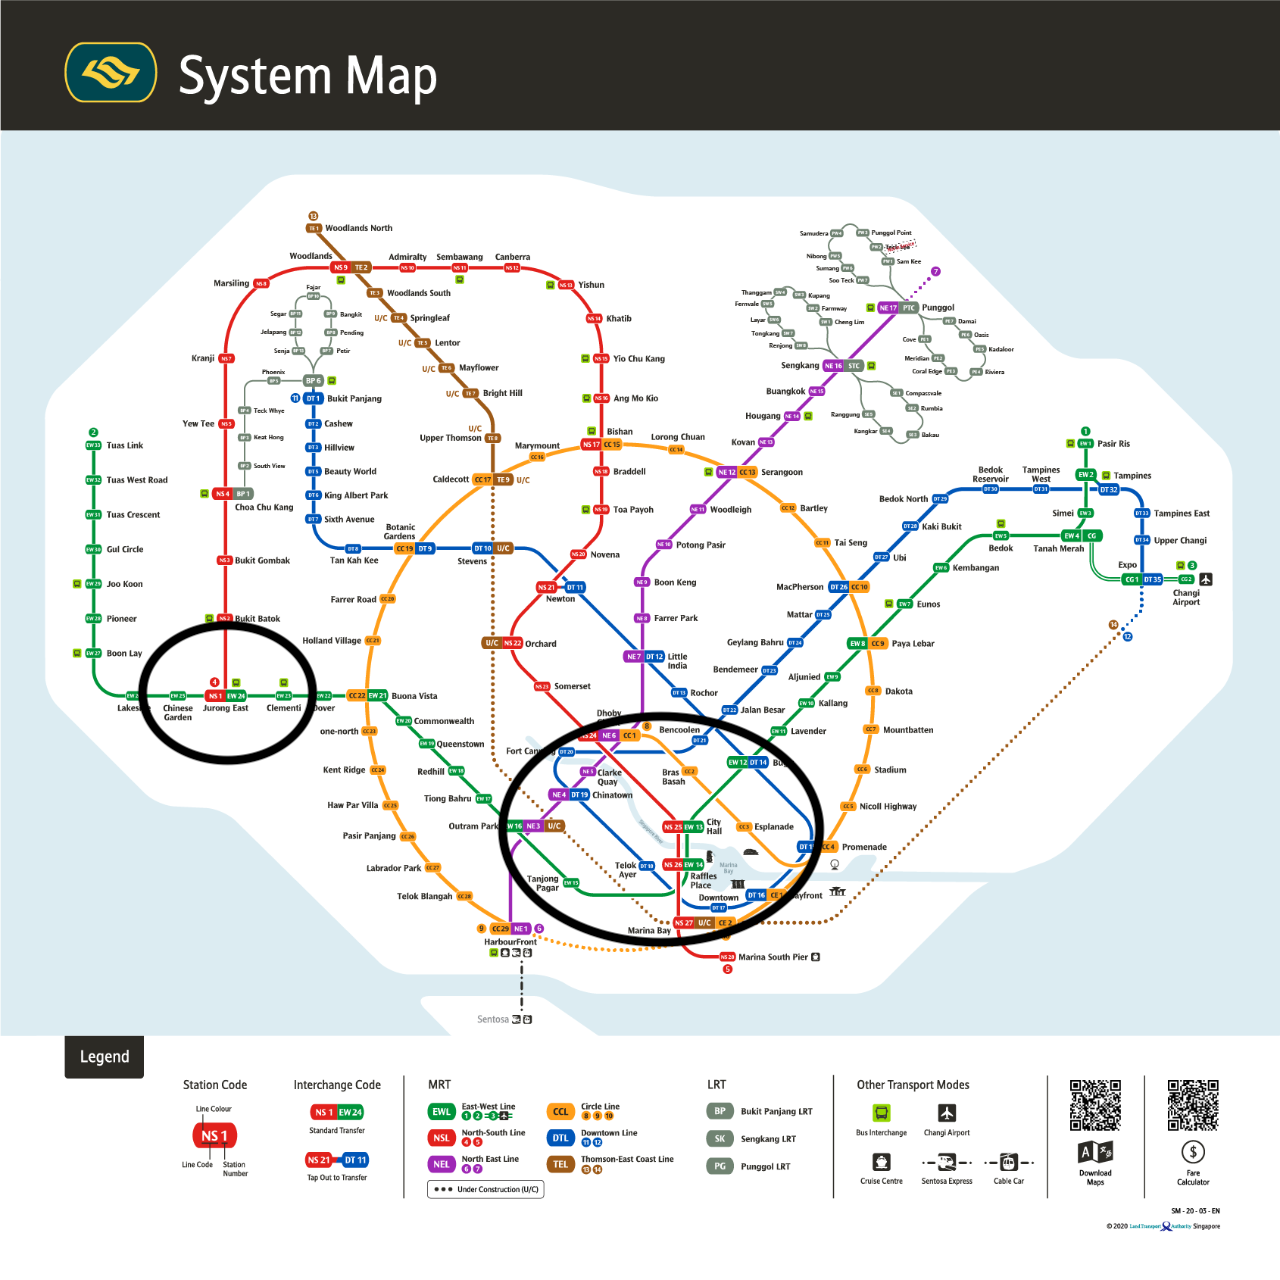

In [22]:
Image('train_network.png')

To get a better grasp on betweenness centrality, lets take a look at a barbell graph.

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


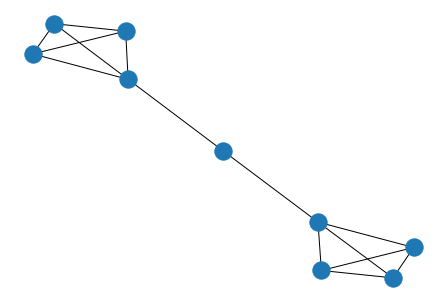

In [59]:
g = nx.barbell_graph(m1=4,m2=1)
nx.draw(g)
plt.show()

Let's take a look at this graphs betweeness centrality.

In [24]:
nx.betweenness_centrality(g)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.5357142857142857,
 5: 0.5357142857142857,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 4: 0.5714285714285714}

This returns a dictionary where the nodes are the keys and the betweenness centrality values are the values. As we can see the majortiy of nodes have a betweenness centrality of zero. This means that these nodes are located at the end of the barbell graph and these nodes are fully connected. With the exception of the bridge node and the center node there is no shortest path that needs to run through any of these nodes and therefore they have a betweenness centrality of zero. Now that we have a better idea of betweenness centrality lets use these techniques to analyse the marvel dataset.

In [13]:
bet_cen = nx.betweenness_centrality(marvel_graph)
top_5_bet = sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[:5]
top_5_bet

[('SPIDER-MAN/PETER PAR', 0.07353937187188773),
 ('CAPTAIN AMERICA', 0.05696895881659234),
 ('IRON MAN/TONY STARK ', 0.03723252432276635),
 ('WOLVERINE/LOGAN ', 0.035702575068418646),
 ('HAVOK/ALEX SUMMERS ', 0.035660110630812786)]

As we can see the most important hero in the dataset according to betweenness centrality is 'Spider-Man' i.e. Spider-Man is an essential node in the network to get to other nodes, if Spider-Man was removed than certain nodes may not be connected at all. To get a better idea of the spread of betweenness centrality of the top 5 heroes lets plot it.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

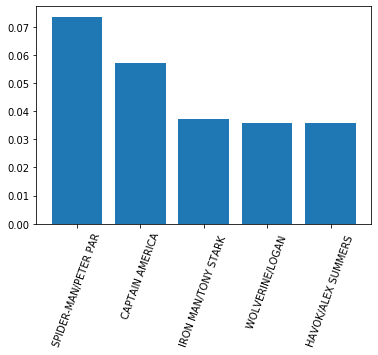

In [53]:
plt.bar(range(len(top_5_bet)), [val[1] for val in top_5_bet], align='center')
plt.xticks(range(len(top_5_bet)), [val[0] for val in top_5_bet])
plt.xticks(rotation=70)

As we can see there is quite a large gap between Iron Man and Spider-Man, now lets check the spread of all heroes betweenness centrality.

(array([6.376e+03, 2.700e+01, 1.100e+01, 7.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.        , 0.00735394, 0.01470787, 0.02206181, 0.02941575,
        0.03676969, 0.04412362, 0.05147756, 0.0588315 , 0.06618543,
        0.07353937]),
 <a list of 10 Patch objects>)

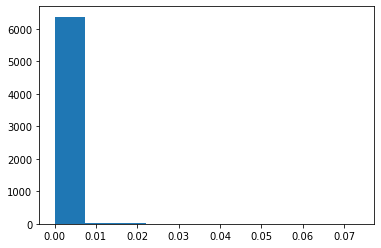

In [54]:
plt.hist(list(bet_cen.values()))

As we can see the majority of heroes have a betweenness centrality between 0 and 0.0075. Therefore Spider-Man is seen as an outlier. It is quite obvious that Spider-Man is much more important than the average hero according to betweenness centrality but lets take a look and see by how much.

In [55]:
avg_bet = sum(n for _, n in sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[1:])/len(sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[1:])
avg_bet

0.000242215166823805

As we can see the average betweenness centrality is 0.000242215166823805, now lets take a look at the betweenness centrality of the average hero and compare it to the most important by betweenness centrality(Spider-Man). 

(array([0, 1]), <a list of 2 Text xticklabel objects>)

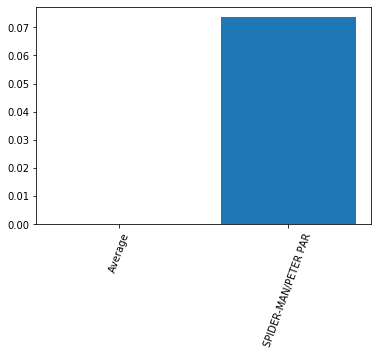

In [56]:
avg_tuple_b = [('Average',avg_bet)]
#Concatenating both tuple pairs to make it easier to plot
list_tuple_b = avg_tuple_b+sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[:1]
plt.bar(range(len(list_tuple_b)), [val[1] for val in list_tuple_b], align='center')
plt.xticks(range(len(list_tuple_b)), [val[0] for val in list_tuple_b])
plt.xticks(rotation=70)

As we can see the difference between the betweenness centrality of Spider-Man is significently greater than the betweenness centrality of the average hero. Let's now take a look at the 5 least important characters by betweenness centrality.

In [26]:
bot_5_bet = sorted(bet_cen.items(), key=lambda x:x[1], reverse=False)[:5]
bot_5_bet

[('ZANIAC/BRAD WOLFE', 0.0),
 ('LUMLEY, JUDY', 0.0),
 ('MCCORMICK, BARRY', 0.0),
 ('STAR THIEF II', 0.0),
 ('CONOVER, REV. WILLIA', 0.0)]

As we can see there are quite a lot of heroes that have a betweenness centrality of zero. As stated above, this means that these heroes are at the end of the graph and are fully connected i.e. no shortest paths exist between them and a neighbor due to them being fully connected.

Let's say a hero has a high degree centrality but a low betweenness centrality then this hero would have many connections but little or no influence over the network. Overall betweenness centrality is useful when trying to analyze communication dynamics but needs to be used with care. A high betweenness score could indicate someone holds authority over disparate clusters in a network.

## Eigenvector Centrality

One other method used to calculate importance of nodes in a network is the idea of Eigenvector centrality. Like degree centrality, Eigenvector centrality measures a node's influence based on the number of links it has to other nodes in the network. Eigenvector centrality then goes a step further by also taking into account how well connected a node is, and how many links their connections have and so on throughout the network. Let's go back to our example we used for degree centrality regarding the president and a social media influencer, according to degree centrality the social media influencer would be seen as more important but eigenvector centrality will take into consideration how important the presidents connections are and therefore will say that he is more important. Eigenvector centrality can be used to find who or what holds wide-reaching influence in a network or who or what is important in a network on a macro scale. Now let's take a look at the top 5 most important heroes in the marvel universe according to eigenvector centrality.

In [18]:
eig_cen = nx.eigenvector_centrality(marvel_graph)
top_5_eig = sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[:5]
top_5_eig

[('CAPTAIN AMERICA', 0.11677469223625939),
 ('IRON MAN/TONY STARK ', 0.10254077322184336),
 ('SCARLET WITCH/WANDA ', 0.10082113046617165),
 ('THING/BENJAMIN J. GR', 0.10078249100850409),
 ('SPIDER-MAN/PETER PAR', 0.1002321495868602)]

As we can see Captain America is seen as the most important hero in the dataset by eigenvector centrality and Spider-Man is now the 5th most important. Spider-Man was seen as the most important by betweenness centrality but the 5th most important by eigenvector centrality this means that Spider-Man connects disparate parts of the network but he's still some distance from the centres of power in the network. Let's now take a look at the spread of eigenvector centralities for the top 5 most important heroes.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

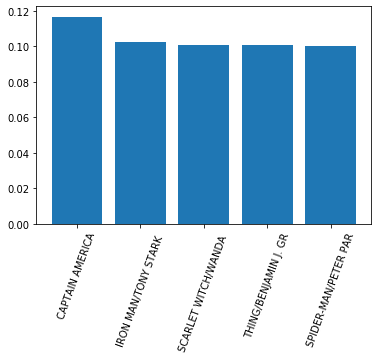

In [19]:
plt.bar(range(len(top_5_eig)), [val[1] for val in top_5_eig], align='center')
plt.xticks(range(len(top_5_eig)), [val[0] for val in top_5_eig])
plt.xticks(rotation=70)

As we can see all the eigenvector centralities are relatively close with Iron Man to Spider-Man being very close. Let's investigate the spread of all the eigenvector centralities to get a better idea of the dataset.

(array([5.553e+03, 4.990e+02, 1.920e+02, 8.300e+01, 4.300e+01, 1.900e+01,
        1.100e+01, 1.400e+01, 1.100e+01, 1.000e+00]),
 array([3.07526940e-23, 1.16774692e-02, 2.33549384e-02, 3.50324077e-02,
        4.67098769e-02, 5.83873461e-02, 7.00648153e-02, 8.17422846e-02,
        9.34197538e-02, 1.05097223e-01, 1.16774692e-01]),
 <a list of 10 Patch objects>)

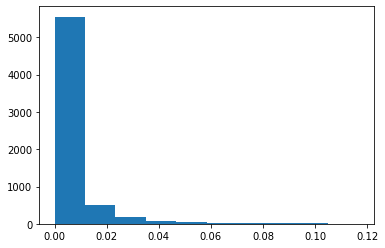

In [20]:
plt.hist(list(eig_cen.values()))

As we can see the majority of heroes have an eigenvector centrality in the range of 0 and 0.01. Let's take a look at this information using a boxplot to check if the top 5 can be seen as outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1a1fa17ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1fa1b5d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1fa08e90>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1fa1bb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1fa23550>],
 'means': []}

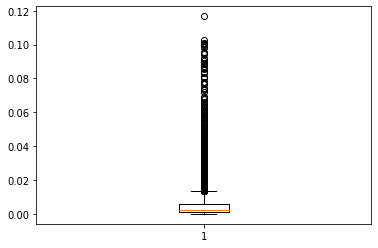

In [21]:
plt.boxplot(list(eig_cen.values()))

As we can see from the boxplot any eigenvector centrality values that are greater than 0.0175 can be seen as an outlier, of course all of the top 5 eigenvector centralities are greater than this and are therefore outliers. Like we have done for degree centrality and betweenness centrality lets calculate the average eigenvector centrality in the dataset.

In [22]:
avg_eig = sum(n for _, n in sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[1:])/len(sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[1:])
avg_eig

0.0060296823026103384

As we can see the average eigenvector centrality of the dataset is 0.006296823026103384. Let's now compare this to the most important(Captain America) graphically to get a better idea of the importance of him.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

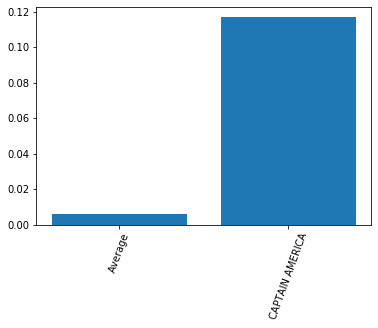

In [23]:
avg_tuple_eig = [('Average',avg_eig)]
#Concatenating both tuple pairs to make it easier to plot
list_tuple_eig = avg_tuple_eig+sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[:1]
plt.bar(range(len(list_tuple_eig)), [val[1] for val in list_tuple_eig], align='center')
plt.xticks(range(len(list_tuple_eig)), [val[0] for val in list_tuple_eig])
plt.xticks(rotation=70)

From the graph above we can see just how much more important Captain America is than the average hero in the marvel universe. Let's take a look at an example of a hero who has a high degree centrality rank but a relatively low eigenvector centrality rank.

In [24]:
#creating eigenvector centrality dataframe
sorted_eig_cen = sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)
eig_cen_df = pd.DataFrame.from_records(sorted_eig_cen)
eig_cen_df.columns = ['Hero','Eigenvector Centrality']

In [33]:
#creating degree centrality dataframe
sorted_deg_cen = sorted(deg_cen_marvel.items(), key=lambda x:x[1], reverse=True)
deg_cen_df = pd.DataFrame.from_records(sorted_deg_cen)
deg_cen_df.columns = ['Hero','Degree Centrality']

Now that we have the dataframes created, let's create a function which will give us the rank of the heroes degree centrality and eigenvector centrality.

In [34]:
def compare_deg_eig(hero):
    return eig_cen_df[eig_cen_df.Hero==hero], deg_cen_df[deg_cen_df.Hero==hero]

Now that we have the function defined let's take a look at the hero 'Gambit Doppelganger'.

In [35]:
compare_deg_eig('GAMBIT DOPPELGANGER')

(                    Hero  Eigenvector Centrality
 428  GAMBIT DOPPELGANGER                0.021503,
                     Hero  Degree Centrality
 773  GAMBIT DOPPELGANGER           0.014319)

As we can see Gambit Doppelganger's degree centrality rank(773) is a lot worse than his eigenvector centrality rank(428). This means that Gambit doesn't have that much connections but the connections he does have are seen as being somewhat important. Now let's take a look at an example of a hero that has a low betweenness centrality score but a high eigenvector centrality score.

In [2]:
#creating betweenness centrality dataframe
sorted_bet_cen = sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)
bet_cen_df = pd.DataFrame.from_records(sorted_bet_cen)
bet_cen_df.columns = ['Hero', 'Betweenness Centrality ']

NameError: name 'bet_cen' is not defined

Now that we have all the dataframes that are required created lets define a function that allows us to compare betweenness centrality and eigenvector centrality.

In [52]:
def compare_bet_eig(hero):
    return eig_cen_df[eig_cen_df.Hero==hero], bet_cen_df[bet_cen_df.Hero==hero]

Now we have our function defined lets take a look at the hero 'Siege/John Kelly'.

In [55]:
compare_bet_eig('SIEGE/JOHN KELLY')

(                  Hero  Eigenvector Centrality
 4154  SIEGE/JOHN KELLY                0.001289,
                   Hero  Betweenness Centrality 
 6422  SIEGE/JOHN KELLY                      0.0)

As we can see Siege has a betweenness centrality of 0 and an eigenvector centrality of 0.001289, this means that he is fully connected(no shortest paths exist) and therefore they have very little or no influence over the network but he has numerous connections which are of somewhat importance. Now let's take a look at the 5 least important heroes in the marvel universe.

In [56]:
bot_5_eig = sorted(eig_cen.items(), key=lambda x:x[1], reverse=False)[:5]
bot_5_eig

[('STEEL SPIDER/OLLIE O', 3.075269403999653e-23),
 ('MASTER OF VENGEANCE', 3.075269403999653e-23),
 ('PANTHER CUB/', 8.483276275750817e-18),
 ('MANT/ERNEST', 8.483276275750817e-18),
 ('SWORDSMAN IV/', 8.483276275750817e-18)]

As we can see Steel Spider is the least important hero in the dataset by eigenvector centrality. i.e. Steel Spider has the least influence over the network. Overall, I personally feel eigenvector centrality is the most useful method for analyzing hero importance for our dataset as it identifies nodes with influence over the whole network, not just those directly connected to it and therefore I would say that 'Captain America' is the most important hero in the marvel universe.

# What heroes might make interesting storylines?

Another key concept in Network Analysis is the idea of cliques. In a social context a clique is defined as a tightly knit group where everyone knows eachother. Let's take a look at the examples of cliques below, as we can see every node is connected and they can vary in size.

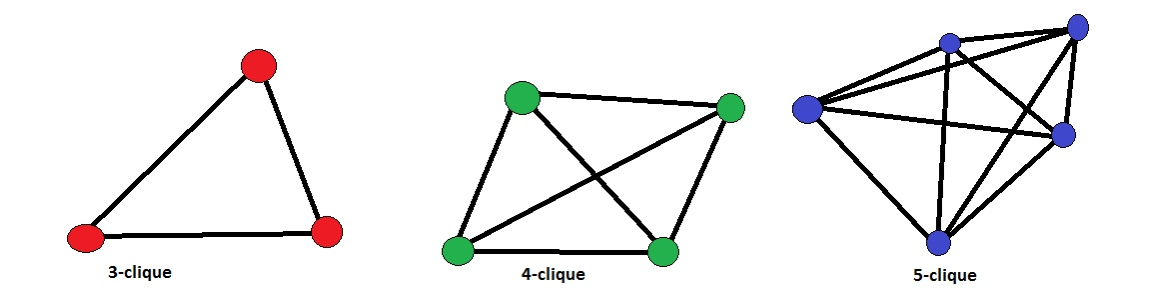

In [58]:
Image('cliques.jpeg')

Now let's have a look at the idea of maximal cliques. Maximal cliques are defined as a clique that, when extended by one node is no longer a clique. Let's take a look at the graph below. Before we find the maximal cliques in this graph let me ask you by looking at the graph how much maximal cliques do you think exists? Personally, I would say two but this is indeed wrong and there is in fact four, let me show you why.

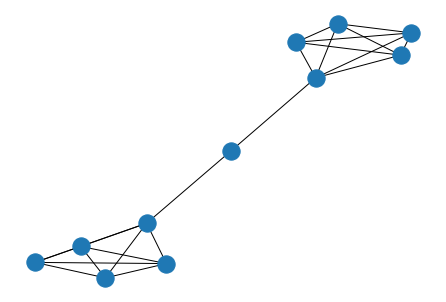

In [60]:
G = nx.barbell_graph(m1=5, m2=1)
nx.draw(G)
plt.show()

In [61]:
list(nx.find_cliques(G))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

As we can see, there are four maximal cliques in graph G, two of size five and two of size two. Edges are also a clique and therefore the two maximal cliques of size two are a clique.

Now lets pretend we are writing a new marvel comic and I'm interested in what heroes I should have in the comic that would make for an interesting storyline. Since the marvel universe is all set in 'Earth-616' this means that it is possible for a hero to know of another hero even though they have never met i.e. through mutual connections. Now, using the idea of open triangles let's build a recommendation system i.e. let's see which hero should know of eachother through mutual connections but have never actually appeared together in a comic. Let's check the top 10 characters who should know of eachother but have never directly met.

In [79]:
# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in marvel_graph
for n, d in marvel_graph.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(marvel_graph.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not marvel_graph.has_edge(n1,n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 5 pairs of heroes
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[('INVISIBLE WOMAN/SUE ', 'BLOB/FRED J. DUKES'), ('THING/BENJAMIN J. GR', 'BLOB/FRED J. DUKES'), ('MARVEL GIRL/JEAN GRE', 'CAGE, LUKE/CARL LUCA'), ('STORM/ORORO MUNROE S', 'WONG'), ('IRON MAN/TONY STARK ', 'BANSHEE/SEAN CASSIDY'), ('ANT-MAN/DR. HENRY J.', 'KA-ZAR/KEVIN PLUNDER'), ('JARVIS, EDWIN ', 'CAPTAIN BRITAIN/BRIA'), ('SHADOWCAT/KATHERINE ', 'JAMESON, J. JONAH'), ('HUMAN TORCH/JOHNNY S', 'BLOB/FRED J. DUKES')]


This returns a list of tuples with the first element in each tuple being hero1 and the second element being hero2. Let's take for example the first tuple, this means that it is quite likely that 'Invisible Woman. knows of 'Blob' through mutual connections but has never met him. As a writer this may mean that perhaps having a comic with both 'Invisible Woman' and 'Blob' might make for an interesting story line.

Now, we know we want to add Invisible Woman and Blob to the comic but let's say we want to also add a clique that Invisible Woman is in and also a clique that 'Blob' is in. Let's take a look at all cliques they are in.

In [80]:
[n for n in nx.find_cliques(marvel_graph) if 'INVISIBLE WOMAN/SUE ' in n]

[['SILVANI, VITTORIO',
  'ROCKETLAUNCHER/',
  'IRON MAN/TONY STARK ',
  'SMOKESCREEN/',
  'BOOBYTRAP/',
  'AIRBORNE/',
  'FIREFIGHT/',
  'HOGAN, VIRGINIA PEPP',
  'JAMESON, MARLA MADIS',
  'PSYLOCKE/ELISABETH B',
  'MANDARIN',
  'MODOK/GEORGE TARLETO',
  'IRON MAN IV/JAMES R.',
  'SHEFFIELD, LEAH',
  'HANRAHAN, GORDON',
  'NELSON, FRANKLIN FOG',
  'MADAME MENACE/SUNSET',
  'MADAME MASQUE/GIULIE',
  'INVISIBLE WOMAN/SUE ',
  'GREEN GOBLIN/NORMAN ',
  'MIDAS',
  'STARK, MORGAN',
  'ROBERTS, CHESS',
  'SHARPE, ROSALINDE',
  'ANGEL/WARREN KENNETH',
  'JAMESON, J. JONAH',
  'MR. FANTASTIC/REED R'],
 ['SILVANI, VITTORIO',
  'ROCKETLAUNCHER/',
  'IRON MAN/TONY STARK ',
  'SMOKESCREEN/',
  'BOOBYTRAP/',
  'AIRBORNE/',
  'FIREFIGHT/',
  'HOGAN, VIRGINIA PEPP',
  'SHARPE, ROSALINDE',
  'MANDARIN',
  'JARVIS, EDWIN ',
  'MODOK/GEORGE TARLETO',
  'IRON MAN IV/JAMES R.',
  'NELSON, FRANKLIN FOG',
  'GREEN GOBLIN/NORMAN ',
  'MADAME MASQUE/GIULIE',
  'MIDAS',
  'STARK, MORGAN',
  'INVISIBLE WOMAN/SU

In [81]:
[n for n in nx.find_cliques(marvel_graph) if 'BLOB/FRED J. DUKES' in n]

[['SHOCKWAVE/LANCASTER ',
  'LEEDS, BETTY BRANT',
  'SPIDER-MAN/PETER PAR',
  'SCARLET WITCH/WANDA ',
  'THOR/DR. DONALD BLAK',
  'UNUS THE UNTOUCHABLE',
  'IRON MAN/TONY STARK ',
  'CAGE, LUKE/CARL LUCA',
  'BLOB/FRED J. DUKES'],
 ['SHOCKWAVE/LANCASTER ',
  'LEEDS, BETTY BRANT',
  'SPIDER-MAN/PETER PAR',
  'SCARLET WITCH/WANDA ',
  'THOR/DR. DONALD BLAK',
  'WONDER MAN/SIMON WIL',
  'NOVA/RICHARD RIDER',
  'IRON MAN/TONY STARK ',
  'BLOB/FRED J. DUKES',
  'BOOMERANG/FRED MYERS',
  'WATSON-PARKER, MARY '],
 ['SHOCKWAVE/LANCASTER ',
  'LEEDS, BETTY BRANT',
  'SPIDER-MAN/PETER PAR',
  'SCARLET WITCH/WANDA ',
  'THOR/DR. DONALD BLAK',
  'WONDER MAN/SIMON WIL',
  'NOVA/RICHARD RIDER',
  'IRON MAN/TONY STARK ',
  'BLOB/FRED J. DUKES',
  'CAGE, LUKE/CARL LUCA',
  'ANT-MAN/DR. HENRY J.',
  'BLACK KNIGHT V/DANE '],
 ['SHOCKWAVE/LANCASTER ',
  'LEEDS, BETTY BRANT',
  'SPIDER-MAN/PETER PAR',
  'SCARLET WITCH/WANDA ',
  'THOR/DR. DONALD BLAK',
  'WONDER MAN/SIMON WIL',
  'NOVA/RICHARD RIDER',
  '

As we can see both 'Invisible Woman' and 'Blob' are in a lot of cliques. Let's say we want to narrow this down and add a clique of size four for 'Invisible Woman' and a clique of size 5 for 'Blob. Let's create a function which will return all maximal cliques in a graph of size n.

In [93]:
def maximal_cliques(G,size):
    """
    Finds all maximal cliques in graph `G` that are of size `size`.
    """
    mcs = []
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs
maximal_cliques(marvel_graph, 6)

[['DOCKERY, RUPERT',
  'SPIDER-MAN/PETER PAR',
  'MULLANY, MIKE',
  'BUSHKIN, BARNEY',
  'PARKER, MAY',
  'SPIDER-WOMAN/JESSICA'],
 ['DOCKERY, RUPERT',
  'SPIDER-MAN/PETER PAR',
  'FLY',
  'BANNON, LANCE',
  'BUSHKIN, BARNEY',
  'PARKER, MAY'],
 ['DOCKERY, RUPERT',
  'SPIDER-MAN/PETER PAR',
  'FLY',
  'SPIDER-WOMAN/JESSICA',
  'BUSHKIN, BARNEY',
  'PARKER, MAY'],
 ['SURGEON GENERAL/ANGE',
  'TERROR II',
  'NELSON, FRANKLIN FOG',
  'SPIDER-MAN/PETER PAR',
  'PAGE, KAREN',
  'DAREDEVIL/MATT MURDO'],
 ['SHOCKWAVE/LANCASTER ',
  'SHANG-CHI',
  'WU, LEIKO',
  'SCARLET WITCH/WANDA ',
  'IRON MAN/TONY STARK ',
  'ANT-MAN/DR. HENRY J.'],
 ['SHOCKWAVE/LANCASTER ',
  'LEEDS, BETTY BRANT',
  'SPIDER-MAN/PETER PAR',
  'CAT III/SHEN KUEI',
  'WATSON-PARKER, MARY ',
  'CAGE, LUKE/CARL LUCA'],
 ['SHOCKWAVE/LANCASTER ',
  'LEEDS, BETTY BRANT',
  'SPIDER-MAN/PETER PAR',
  'CAT III/SHEN KUEI',
  'WATSON-PARKER, MARY ',
  'RAZORFIST III'],
 ['BLADE',
  'ROBERTSON, JOE',
  'SPIDER-MAN/PETER PAR',
  'DR. S

As we can see this returns a list of lists with each list representing a clique of size six. Now, let's have a look of cliques that are of size six where 'Invisible Woman' is a member of the clique and cliques that are of size five where 'Blob' is a member.

In [88]:
[n for n in maximal_cliques(marvel_graph,6) if 'INVISIBLE WOMAN/SUE ' in n]

[['JEMIAH',
  'CONTEMPLATOR/TATH KI',
  'ERISHKIGEL II/HOLLY ',
  'INVISIBLE WOMAN/SUE ',
  'HUMAN TORCH/JOHNNY S',
  'THING/BENJAMIN J. GR'],
 ['ZARATHOS',
  'SPIDER-MAN/PETER PAR',
  'HUMAN TORCH/JOHNNY S',
  'INVISIBLE WOMAN/SUE ',
  'CLOWN/CRAFTY ELIOT F',
  'GHOST RIDER II/JOHNN'],
 ['ZARATHOS',
  'SPIDER-MAN/PETER PAR',
  'HUMAN TORCH/JOHNNY S',
  'INVISIBLE WOMAN/SUE ',
  'CLOWN/CRAFTY ELIOT F',
  'PARKER, MAY'],
 ['EVANS, DORIS',
  'HUMAN TORCH/JOHNNY S',
  'THING/BENJAMIN J. GR',
  'MR. FANTASTIC/REED R',
  'INVISIBLE WOMAN/SUE ',
  'ACROBAT/CARL ZANTE'],
 ['CAPTAIN AMERICA',
  'ACROBAT/CARL ZANTE',
  'INVISIBLE WOMAN/SUE ',
  'HUMAN TORCH/JOHNNY S',
  'THING/BENJAMIN J. GR',
  'MR. FANTASTIC/REED R']]

In [89]:
[n for n in maximal_cliques(marvel_graph,5) if 'BLOB/FRED J. DUKES' in n]

[['OMEGA RED/ARKADY ROS',
  'IVANOVA, ELENA',
  'MAVERICK/CHRISTOPHER',
  'BLOB/FRED J. DUKES',
  'SABRETOOTH/VICTOR CR'],
 ['IVANOVA, ELENA',
  'MAVERICK/CHRISTOPHER',
  'BLOB/FRED J. DUKES',
  'HUDSON, HEATHER',
  'SABRETOOTH/VICTOR CR']]

As we can see above 'Invisible Woman' is in five groups that are of size six while 'Blob' is in three groups that are of size five. Of course I could just pick a group at random to include in the comic but let's say I wanted to refine it even more. Let's say I wanted a ranking system of importance for each group by eigenvector centrality i.e. if I take the average of eigenvector centrality for each group. 

In [90]:
import itertools
def most_popular(hero,N):
#creating an empty list to append degree centrality values to
    eig_cen_ord = []
#extracting all cliques from graph of size 2
    clique_2 = [n for n in maximal_cliques(marvel_graph,N) if hero in n]
#converting 'clique_2' from a list of lists to just a list
    clique_2_iterable = list(itertools.chain.from_iterable(clique_2))
#iterating through the heroes in 'clique_2_iterable'
    for hero in clique_2_iterable:
    #extracting the degree centralities of all heroes in 'clique_2_iterable'
        eig_cen_ordered = [y for x,y in eig_cen.items() if x==hero]
    #appending these values to our empty list 'deg_cen_ord'
        eig_cen_ord.append(eig_cen_ordered)
#converting deg_cen_ord to a list instead of a lists of lists
    eig_cen_final = list(itertools.chain.from_iterable(eig_cen_ord))
#zipping the name of the hero and their degree centrality
    zipped_lists = list(zip(clique_2_iterable,eig_cen_final))
#adding all the elements in deg_cen_final in steps of 2
    sum_eig=[sum(num)/N for num in [eig_cen_final[n:n+N] for n in range(0, len(eig_cen_final), N)]]
    zip_final=list(zip(clique_2,sum_eig))
    return sorted(zip_final,key=lambda x:x[1],reverse=True)

In [91]:
most_popular('INVISIBLE WOMAN/SUE ', 6)

[(['CAPTAIN AMERICA',
   'ACROBAT/CARL ZANTE',
   'INVISIBLE WOMAN/SUE ',
   'HUMAN TORCH/JOHNNY S',
   'THING/BENJAMIN J. GR',
   'MR. FANTASTIC/REED R'],
  0.0854986912835124),
 (['EVANS, DORIS',
   'HUMAN TORCH/JOHNNY S',
   'THING/BENJAMIN J. GR',
   'MR. FANTASTIC/REED R',
   'INVISIBLE WOMAN/SUE ',
   'ACROBAT/CARL ZANTE'],
  0.06695487149767387),
 (['ZARATHOS',
   'SPIDER-MAN/PETER PAR',
   'HUMAN TORCH/JOHNNY S',
   'INVISIBLE WOMAN/SUE ',
   'CLOWN/CRAFTY ELIOT F',
   'PARKER, MAY'],
  0.05847886857894624),
 (['ZARATHOS',
   'SPIDER-MAN/PETER PAR',
   'HUMAN TORCH/JOHNNY S',
   'INVISIBLE WOMAN/SUE ',
   'CLOWN/CRAFTY ELIOT F',
   'GHOST RIDER II/JOHNN'],
  0.057526180426491345),
 (['JEMIAH',
   'CONTEMPLATOR/TATH KI',
   'ERISHKIGEL II/HOLLY ',
   'INVISIBLE WOMAN/SUE ',
   'HUMAN TORCH/JOHNNY S',
   'THING/BENJAMIN J. GR'],
  0.0554237985740342)]

In [92]:
most_popular('BLOB/FRED J. DUKES',5)

[(['IVANOVA, ELENA',
   'MAVERICK/CHRISTOPHER',
   'BLOB/FRED J. DUKES',
   'HUDSON, HEATHER',
   'SABRETOOTH/VICTOR CR'],
  0.02503815696962477),
 (['OMEGA RED/ARKADY ROS',
   'IVANOVA, ELENA',
   'MAVERICK/CHRISTOPHER',
   'BLOB/FRED J. DUKES',
   'SABRETOOTH/VICTOR CR'],
  0.019293237274605746)]

As we can see this list is now a list of tuples with the second tuple being the average eigenvector centrality of that group. From a writers perspective you would include the 'most important' group of the list i.e. the first group in each list this could allow for a more interesting and deeper storyline but could also allow the comic to automatically become more popular due to the popular characters you could add to the comic.